In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
solar_data = pd.read_csv('un_solar_data.csv')
solar_data.head()

,Country or Area,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes
0,Afghanistan,Electricity - total solar production,2022.0,"Kilowatt-hours, million",64.00,1.0
1,Afghanistan,Electricity - total solar production,2021.0,"Kilowatt-hours, million",64.00,1.0
2,Afghanistan,Electricity - total solar production,2020.0,"Kilowatt-hours, million",65.93,NaN
3,Afghanistan,Electricity - total solar production,2019.0,"Kilowatt-hours, million",54.77,NaN
4,Afghanistan,Electricity - total solar production,2018.0,"Kilowatt-hours, million",35.00,NaN


In [9]:
# Filter the dataset for the last 5 years (2018-2022) and focus on total solar production
solar_data_recent = solar_data[(solar_data["Year"] >= 2018) & (solar_data["Year"] <= 2022)]

# Group by country and calculate the difference in quantity from 2018 to 2022 to get the growth
growth_by_country = solar_data_recent.groupby("Country or Area")["Quantity"].agg(["first", "last"])
growth_by_country["Growth"] = growth_by_country["last"] - growth_by_country["first"]

# Sort countries by their growth in solar energy production
growth_sorted = growth_by_country.sort_values(by="Growth", ascending=False).reset_index()

# Display the top countries with the highest growth in solar energy production
growth_sorted.head(10)


,Country or Area,first,last,Growth
0,United Kingdom,12137.955,12668.391,530.436
1,Romania,1703.350,1771.027,67.677
2,Czechia,2315.964,2364.775,48.811
3,United Rep. of Tanzania,47.242,88.000,40.758
4,Mauritania,118.797,148.000,29.203
5,Algeria,642.000,654.700,12.700
6,Zimbabwe,18.131,24.400,6.269
7,Belarus,172.000,177.000,5.000
8,Vanuatu,3.140,6.136,2.996
9,Cook Islands,7.180,10.171,2.991


# Appendix A1

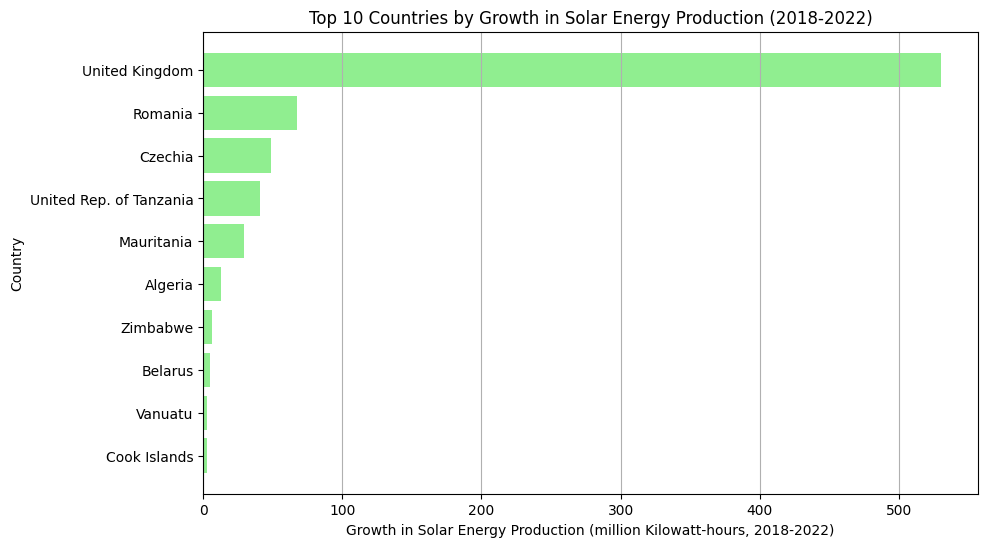

In [15]:
# Plotting the absolute growth for each country in a bar chart
plt.figure(figsize=(10, 6))
plt.barh(growth_sorted['Country or Area'].head(10), growth_sorted['Growth'].head(10), color='lightgreen')
plt.xlabel('Growth in Solar Energy Production (million Kilowatt-hours, 2018-2022)')
plt.ylabel('Country')
plt.title('Top 10 Countries by Growth in Solar Energy Production (2018-2022)')
plt.gca().invert_yaxis()  # Invert y axis to have the largest growth at the top
plt.grid(axis='x')
plt.show()


In [17]:
# Calculate percentage growth instead of absolute growth
growth_by_country["Percentage Growth"] = (growth_by_country["Growth"] / growth_by_country["first"]) * 100

# Sort countries by their percentage growth in solar energy production
growth_sorted_percentage = growth_by_country.sort_values(by="Percentage Growth", ascending=False).reset_index()

# Display the top countries with the highest percentage growth in solar energy production
growth_sorted_percentage.head(10)


,Country or Area,first,last,Growth,Percentage Growth
0,Vanuatu,3.140,6.136,2.996,95.414013
1,United Rep. of Tanzania,47.242,88.000,40.758,86.274925
2,St. Helena and Depend.,0.970,1.654,0.684,70.515464
3,Cabo Verde,6.700,9.500,2.800,41.791045
4,Cook Islands,7.180,10.171,2.991,41.657382
5,Zimbabwe,18.131,24.400,6.269,34.576140
6,Mauritania,118.797,148.000,29.203,24.582271
7,Tuvalu,1.600,1.984,0.384,24.000000
8,Côte d'Ivoire,17.600,18.402,0.802,4.556818
9,United Kingdom,12137.955,12668.391,530.436,4.370061


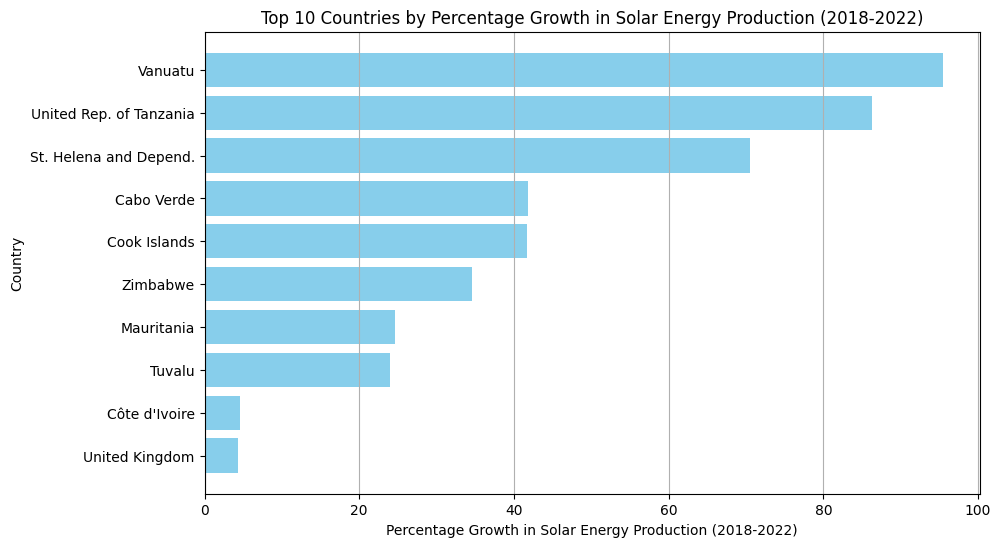

In [18]:
import matplotlib.pyplot as plt

# Plotting the percentage growth for each country in a bar chart
plt.figure(figsize=(10, 6))
plt.barh(growth_sorted_percentage['Country or Area'].head(10), growth_sorted_percentage['Percentage Growth'].head(10), color='skyblue')
plt.xlabel('Percentage Growth in Solar Energy Production (2018-2022)')
plt.ylabel('Country')
plt.title('Top 10 Countries by Percentage Growth in Solar Energy Production (2018-2022)')
plt.gca().invert_yaxis()  # Invert y axis to have the highest percentage at the top
plt.grid(axis='x')
plt.show()


In [19]:
wind_data = pd.read_csv('wind_data.csv')
wind_data.head()

,Country or Area,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes
0,Algeria,Electricity - total wind production,2021.0,"Kilowatt-hours, million",11.0,NaN
1,Algeria,Electricity - total wind production,2020.0,"Kilowatt-hours, million",8.0,NaN
2,Algeria,Electricity - total wind production,2019.0,"Kilowatt-hours, million",10.0,NaN
3,Algeria,Electricity - total wind production,2018.0,"Kilowatt-hours, million",10.0,NaN
4,Argentina,Electricity - total wind production,2022.0,"Kilowatt-hours, million",14164.0,NaN


In [20]:
# Filter the wind dataset for the last 5 years (2018-2022)
wind_data_recent = wind_data[(wind_data["Year"] >= 2018) & (wind_data["Year"] <= 2022)]

# Group by country and calculate the difference in wind energy production quantity from 2018 to 2022 to get the growth
growth_by_country_wind = wind_data_recent.groupby("Country or Area")["Quantity"].agg(["first", "last"])
growth_by_country_wind["Growth"] = growth_by_country_wind["last"] - growth_by_country_wind["first"]

# Sort countries by their growth in wind energy production
growth_sorted_wind = growth_by_country_wind.sort_values(by="Growth", ascending=False).reset_index()

# Display the top countries with the highest growth in wind energy production
growth_sorted_wind.head(10)


,Country or Area,first,last,Growth
0,Ethiopia,560.5620,848.060,287.4980
1,Honduras,685.7971,928.700,242.9029
2,Costa Rica,1573.3000,1798.875,225.5750
3,Nicaragua,655.8380,801.000,145.1620
4,Philippines,1030.0000,1152.900,122.9000
5,Curaçao,196.9550,233.760,36.8050
6,Jamaica,271.8200,302.000,30.1800
7,Tunisia,425.0700,453.000,27.9300
8,Venezuela (Bolivar. Rep.),16.2200,43.000,26.7800
9,Ecuador,60.6000,80.260,19.6600


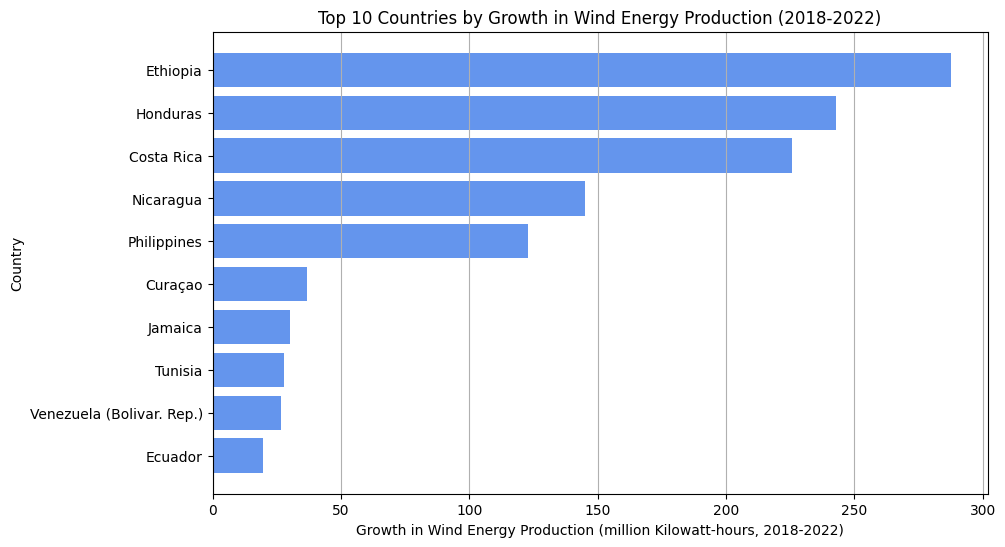

In [21]:
# Plotting the absolute growth for each country in wind energy production
plt.figure(figsize=(10, 6))
plt.barh(growth_sorted_wind['Country or Area'].head(10), growth_sorted_wind['Growth'].head(10), color='cornflowerblue')
plt.xlabel('Growth in Wind Energy Production (million Kilowatt-hours, 2018-2022)')
plt.ylabel('Country')
plt.title('Top 10 Countries by Growth in Wind Energy Production (2018-2022)')
plt.gca().invert_yaxis()  # Invert y axis to have the largest growth at the top
plt.grid(axis='x')
plt.show()


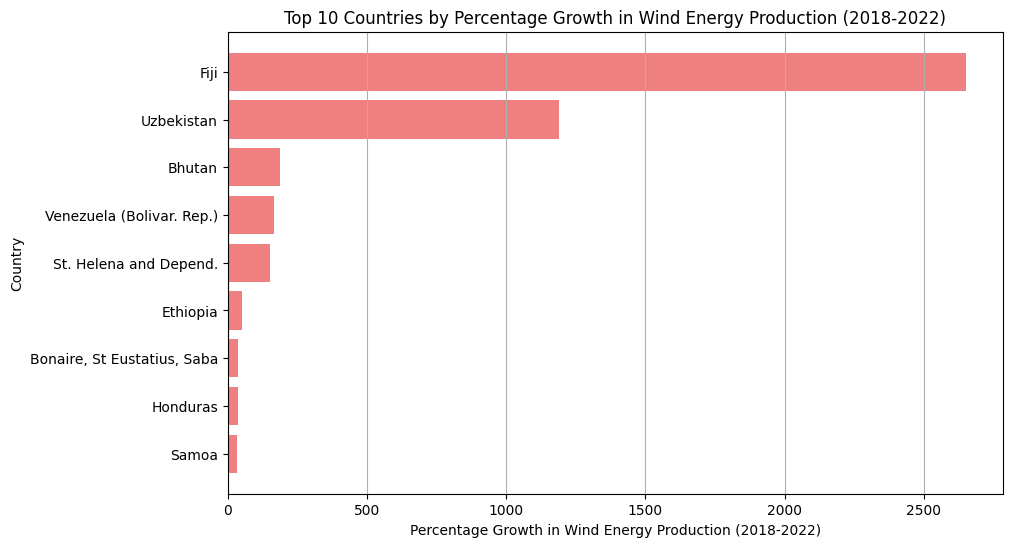

In [22]:
# Calculate percentage growth for wind energy
growth_by_country_wind["Percentage Growth"] = (growth_by_country_wind["Growth"] / growth_by_country_wind["first"]) * 100

# Sort countries by their percentage growth in wind energy production
growth_sorted_percentage_wind = growth_by_country_wind.sort_values(by="Percentage Growth", ascending=False).reset_index()

# Plotting the percentage growth for each country in wind energy production
plt.figure(figsize=(10, 6))
plt.barh(growth_sorted_percentage_wind['Country or Area'].head(10), growth_sorted_percentage_wind['Percentage Growth'].head(10), color='lightcoral')
plt.xlabel('Percentage Growth in Wind Energy Production (2018-2022)')
plt.ylabel('Country')
plt.title('Top 10 Countries by Percentage Growth in Wind Energy Production (2018-2022)')
plt.gca().invert_yaxis()  # Invert y axis to have the highest percentage at the top
plt.grid(axis='x')
plt.show()


In [25]:
combined_data = pd.concat([wind_data, solar_data])
combined_data_recent = combined_data[(combined_data["Year"] >= 2018) & (combined_data["Year"] <= 2022)]

# Sum up the total renewable energy production (solar + wind) for each country over the last 5 years
total_renewable_by_country = combined_data_recent.groupby("Country or Area")["Quantity"].sum().reset_index()

# Sort countries by their total renewable energy production in descending order to find the top contributors

total_renewable_sorted = total_renewable_by_country.sort_values(by="Quantity", ascending=False).reset_index(drop=True)
# Display the top countries with the highest total renewable energy production
total_renewable_sorted.head(10)

,Country or Area,Quantity
0,China,2883165.000
1,United States,1751981.692
2,Germany,669272.000
3,India,505949.000
4,Japan,330726.682
5,United Kingdom,310923.877
6,Spain,300660.000
7,Brazil,271415.256
8,France,192458.590
9,Italy,173930.567


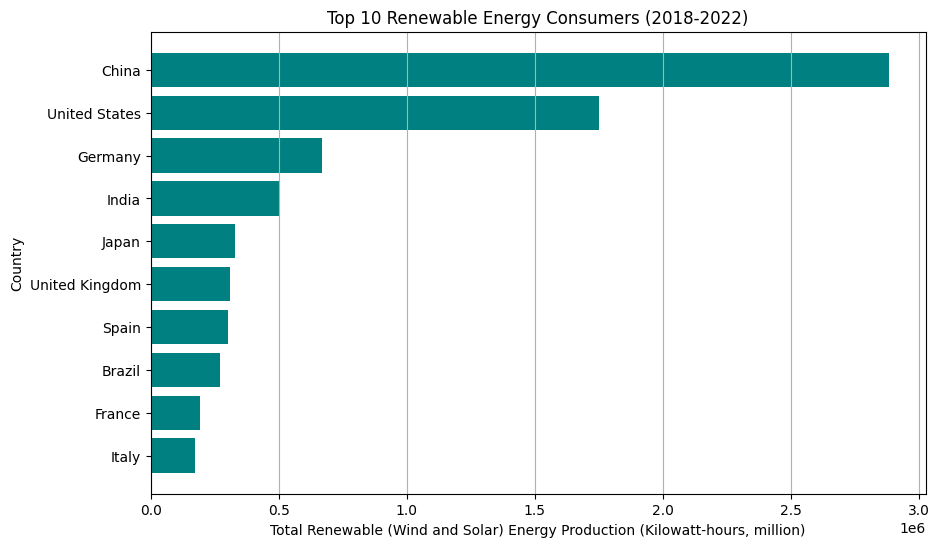

In [31]:
top_10_renewable = total_renewable_sorted.head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_10_renewable['Country or Area'], top_10_renewable['Quantity'], color='teal')
plt.xlabel('Total Renewable (Wind and Solar) Energy Production (Kilowatt-hours, million)')
plt.ylabel('Country')
plt.title('Top 10 Renewable Energy Consumers (2018-2022)')
plt.gca().invert_yaxis()  # To display the highest producer at the top
plt.grid(axis='x')
plt.show()

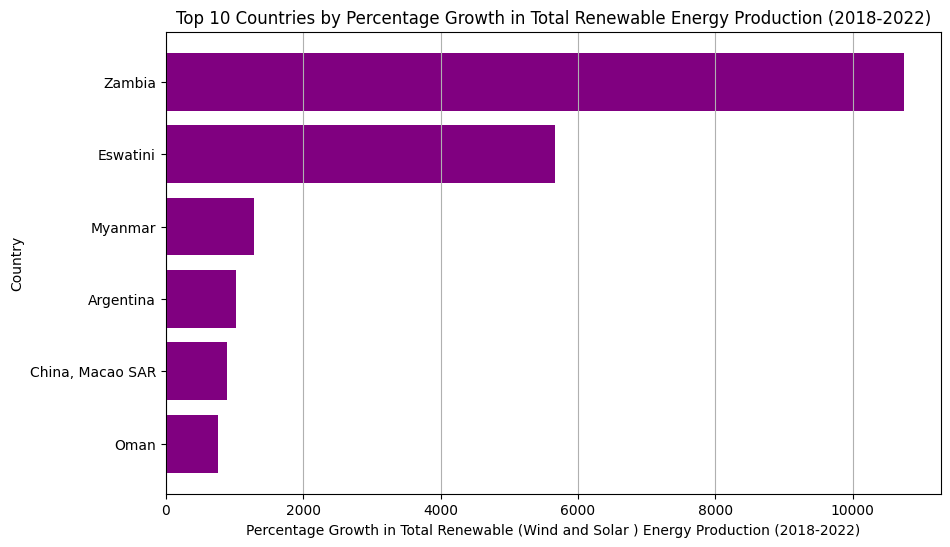

In [33]:
# Calculate the growth in total renewable energy production for each country from the first to the last year available
combined_data_grouped = combined_data_recent.groupby(["Country or Area", "Year"])["Quantity"].sum().unstack().fillna(0)

# Calculate the growth from 2018 to 2022
combined_growth = combined_data_grouped[2022] - combined_data_grouped[2018]

# Calculate the percentage growth
combined_percentage_growth = (combined_growth / combined_data_grouped[2018]) * 100

# Sort by percentage growth
combined_sorted_percentage_growth = combined_percentage_growth.sort_values(ascending=False).reset_index()
combined_sorted_percentage_growth.columns = ['Country or Area', 'Percentage Growth']

# Plotting the top countries by percentage growth in total renewable energy production
plt.figure(figsize=(10, 6))
plt.barh(combined_sorted_percentage_growth['Country or Area'].head(10), combined_sorted_percentage_growth['Percentage Growth'].head(10), color='purple')
plt.xlabel('Percentage Growth in Total Renewable (Wind and Solar ) Energy Production (2018-2022)')
plt.ylabel('Country')
plt.title('Top 10 Countries by Percentage Growth in Total Renewable Energy Production (2018-2022)')
plt.gca().invert_yaxis()  # Invert y axis to have the highest percentage at the top
plt.grid(axis='x')
plt.show()


In [34]:
total_capacity_data = pd.read_csv('total_capacity.csv')
total_capacity_data.head()

,Country or Area,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes
0,Afghanistan,Electricity - total net installed capacity of ...,2022.0,"Kilowatts, thousand",662.0,1.0
1,Afghanistan,Electricity - total net installed capacity of ...,2021.0,"Kilowatts, thousand",558.0,1.0
2,Afghanistan,Electricity - total net installed capacity of ...,2020.0,"Kilowatts, thousand",550.0,1.0
3,Afghanistan,Electricity - total net installed capacity of ...,2019.0,"Kilowatts, thousand",550.0,1.0
4,Afghanistan,Electricity - total net installed capacity of ...,2018.0,"Kilowatts, thousand",540.7,1.0


In [35]:
# Filter for the most recent year of data available for each country to get a current snapshot
most_recent_year = total_capacity_data.groupby('Country or Area')['Year'].transform(max) == total_capacity_data['Year']
total_capacity_recent = total_capacity_data[most_recent_year]

# Calculate the total installed capacity for each country
total_installed_capacity = total_capacity_recent.groupby('Country or Area')['Quantity'].sum().reset_index(name='Total Installed Capacity')

# Calculate installed capacity from wind and solar for each country
wind_solar_filter = total_capacity_recent['Commodity - Transaction'].str.contains('wind|solar', case=False, regex=True)
wind_solar_capacity = total_capacity_recent[wind_solar_filter].groupby('Country or Area')['Quantity'].sum().reset_index(name='Wind and Solar Capacity')

# Merge the total and wind/solar capacities
merged_data = pd.merge(total_installed_capacity, wind_solar_capacity, on='Country or Area', how='left').fillna(0)

# Calculate the percentage of wind and solar in the total installed capacity
merged_data['Wind and Solar Percentage'] = (merged_data['Wind and Solar Capacity'] / merged_data['Total Installed Capacity']) * 100

# Sort countries by the highest percentage of wind and solar in their energy mix
sorted_data = merged_data.sort_values(by='Wind and Solar Percentage', ascending=False).reset_index(drop=True)

sorted_data.head(10)


,Country or Area,Total Installed Capacity,Wind and Solar Capacity,Wind and Solar Percentage
0,Sri Lanka,3865.020,1932.510,50.000000
1,Algeria,2397.200,940.800,39.245787
2,Liechtenstein,132.000,42.000,31.818182
3,Denmark,66005.064,17449.762,26.437005
4,State of Palestine,1352.000,356.000,26.331361
5,Viet Nam,179841.960,46206.980,25.693103
6,Germany,979128.000,246412.000,25.166475
7,Netherlands (Kingd. of the),189006.616,45360.102,23.999214
8,Tuvalu,22.136,5.268,23.798338
9,Tonga,131.280,30.240,23.034735


In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the relevant columns for clustering
features = merged_data[['Total Installed Capacity', 'Wind and Solar Capacity']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply KMeans clustering
# Assuming an initial choice of 3 clusters for demonstration purposes
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(features_scaled)

# Add the cluster labels to the dataframe
merged_data['Cluster'] = kmeans.labels_

# Display the first few rows of the dataframe with cluster labels
merged_data.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Country or Area,Total Installed Capacity,Wind and Solar Capacity,Wind and Solar Percentage,Cluster
0,Afghanistan,2648.0,66.0,2.492447,9
1,Albania,11012.0,246.0,2.233927,9
2,Algeria,2397.2,940.8,39.245787,9
3,American Samoa,200.8,10.4,5.179283,9
4,Andorra,216.0,2.6,1.203704,9


In [49]:
# Correcting the approach to annotate country names on the scatter plot with 10 clusters
# Apply KMeans clustering with 10 clusters
kmeans_10 = KMeans(n_clusters=10, random_state=0)
kmeans_10.fit(features_scaled)

# Add the new cluster labels to the dataframe
merged_data['Cluster_10'] = kmeans_10.labels_


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Appendix B1

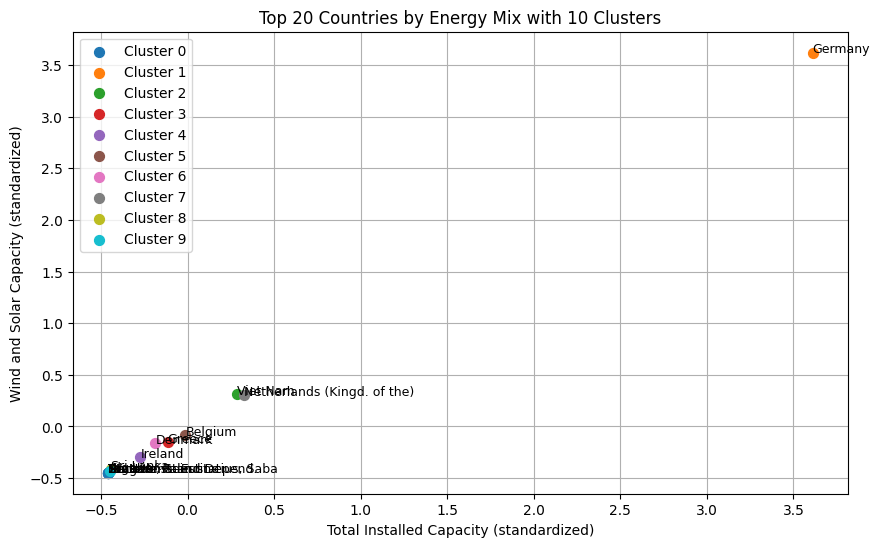

In [45]:
# Correcting the error for the plot with the top 20 countries using 10 clusters
# Assuming 'features_top_20_scaled' and 'kmeans_top_20' have been correctly defined and executed

# Define a colormap for 10 clusters
colors = plt.cm.tab10(np.linspace(0, 1, 10))

# Create the plot
plt.figure(figsize=(10, 6))

for i in range(10):  # Loop over the clusters
    # Get the data points belonging to cluster i
    cluster_data = features_top_20_scaled[top_20_countries['Cluster'] == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], s=50, color=colors[i], label=f'Cluster {i}')

    # Annotate country names for each data point
    countries_in_cluster = top_20_countries[top_20_countries['Cluster'] == i]['Country or Area'].values
    for j, country_name in enumerate(countries_in_cluster):
        if j < len(cluster_data):
            plt.text(cluster_data[j, 0], cluster_data[j, 1], country_name, fontsize=9)

plt.title('Top 20 Countries by Energy Mix with 10 Clusters')
plt.xlabel('Total Installed Capacity (standardized)')
plt.ylabel('Wind and Solar Capacity (standardized)')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
# Reload the dataset in case it has been updated or to ensure the correct dataset is loaded

total_capacity_data_updated = pd.read_csv('total_capacity.csv')

# Filter for the UK data from 2018 to 2022
uk_data_updated = total_capacity_data_updated[(total_capacity_data_updated['Country or Area'] == 'United Kingdom') & (total_capacity_data_updated['Year'] >= 2018) & (total_capacity_data_updated['Year'] <= 2022)]

# Group by Year and Commodity - Transaction to observe changes over this period
uk_trends_updated = uk_data_updated.groupby(['Year', 'Commodity - Transaction'])['Quantity'].sum().unstack(fill_value=0)

# Calculate the year-on-year change for each category within 2018-2022 to identify substantial changes
uk_trends_change_updated = uk_trends_updated.diff().dropna()

uk_trends_change_updated


Commodity - Transaction,Electricity - net installed capacity of electric power plants public solar,"Electricity - net installed capacity of electric power plants, public combustible fuels","Electricity - net installed capacity of electric power plants, public hydro","Electricity - net installed capacity of electric power plants, public nuclear","Electricity - net installed capacity of electric power plants, public wind","Electricity - net installed capacity of electric power plants, self-producer combustible fuels","Electricity - net installed capacity of electric power plants, self-producer hydro","Electricity - net installed capacity of electric power plants, self-producer solar","Electricity - net installed capacity of electric power plants, self-producer tide, wave, marine","Electricity - net installed capacity of electric power plants, self-producer wind",...,"Electricity - total net installed capacity of electric power plants, combustible fuels","Electricity - total net installed capacity of electric power plants, hydro","Electricity - total net installed capacity of electric power plants, main activity","Electricity - total net installed capacity of electric power plants, main activity & autoproducer","Electricity - total net installed capacity of electric power plants, nuclear","Electricity - total net installed capacity of electric power plants, solar","Electricity - total net installed capacity of electric power plants, tide, wave, marine","Electricity - total net installed capacity of electric power plants, wind",Electricity generating capacity - Pumped hydro - Main activity producers,Electricity generating capacity - Pumped hydro - Total
Year,,,,,,,,,,,,,,,,,,,,,
2019.0,396.0,-6596.998,-0.323,0.0,2356.151,725.511,3.183,-110.2,1.898,-74.871,...,-5871.487,2.86,-3845.170,-3299.649,0.0,285.8,1.898,2281.28,0.0,0.0
2020.0,431.0,-1133.000,-2.624,0.0,763.300,-156.478,8.914,-196.8,0.000,-192.600,...,-1289.478,6.29,58.676,-478.288,0.0,234.2,0.000,570.70,0.0,0.0
2021.0,167.0,-112.126,0.730,-1120.0,1140.800,104.586,4.440,219.0,0.000,149.500,...,-7.540,5.17,76.404,553.930,-1120.0,386.0,0.000,1290.30,0.0,0.0


# Appenix A2

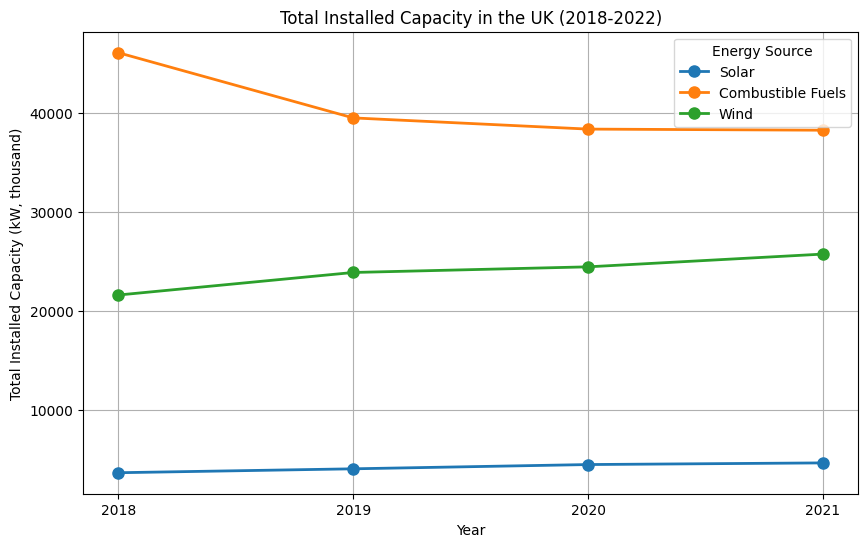

In [47]:
# Since the detailed changes for each year were not visible due to display limitations, let's try plotting the total installed capacity (not just the changes) for these categories from 2018 to 2022 for a clearer overall trend.

# Re-calculating to include all years for the total capacity
uk_total_capacity_trend = uk_data_updated.pivot(index='Year', columns='Commodity - Transaction', values='Quantity')

# Filtering for the relevant categories
uk_total_capacity_trend_filtered = uk_total_capacity_trend[[
    'Electricity - net installed capacity of electric power plants public solar',
    'Electricity - net installed capacity of electric power plants, public combustible fuels',
    'Electricity - total net installed capacity of electric power plants, wind'
]]

# Simplifying the labels for clarity in the plot
labels_simplified = ['Solar', 'Combustible Fuels', 'Wind']

plt.figure(figsize=(10, 6))

for category, label in zip(uk_total_capacity_trend_filtered.columns, labels_simplified):
    plt.plot(uk_total_capacity_trend_filtered.index, uk_total_capacity_trend_filtered[category], marker='o', linestyle='-', linewidth=2, markersize=8, label=label)

plt.title('Total Installed Capacity in the UK (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Total Installed Capacity (kW, thousand)')
plt.legend(title='Energy Source')
plt.grid(True)
plt.xticks(uk_total_capacity_trend_filtered.index)
plt.show()


# Appendix A4

In [48]:
# Load the newly uploaded total capacity dataset for analysis

total_capacity_full_data = pd.read_csv('total_capacity_full.csv')

# Preliminary analysis to identify outliers, nulls, large variance, and potential biases

# Check for null values
null_counts = total_capacity_full_data.isnull().sum()

# Describe the dataset to understand variance and potential outliers
description = total_capacity_full_data.describe()

# Check for biases across regions by analyzing the distribution of data entries per region
region_distribution = total_capacity_full_data['Country or Area'].value_counts()

null_counts, description, region_distribution.head()


(Country or Area                0
 Commodity - Transaction        0
 Year                           2
 Unit                           2
 Quantity                       2
 Quantity Footnotes         54273
 dtype: int64,
                Year      Quantity  Quantity Footnotes
 count  71274.000000  7.127400e+04             17003.0
 mean    2007.181314  8.571122e+03                 1.0
 std        9.268187  5.604089e+04                 0.0
 min     1990.000000  0.000000e+00                 1.0
 25%     1999.000000  2.900000e+01                 1.0
 50%     2008.000000  2.830000e+02                 1.0
 75%     2015.000000  2.581000e+03                 1.0
 max     2022.000000  2.424060e+06                 1.0,
 United States    851
 Japan            754
 France           750
 Spain            722
 Germany          716
 Name: Country or Area, dtype: int64)